#### Graph Connectivity and Traversal

Implementations of BFS, DFS and an algorithm for finding all connected components in a graph. We will use the adjacency list representation only.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph(adjacency_list, fig_size=5):
    # Create a new graph
    G = nx.Graph()

    # Add edges to the graph
    for node, neighbours in enumerate(adjacency_list):
        for neighbour in neighbours:
            G.add_edge(node, neighbour)

    # Draw the graph
    plt.figure(figsize=(fig_size, fig_size))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()


We implement two different version of BFS:

1) In the first version of BFS, we generate a list of `layers`: $(L_0, L_1, L_2, ...)$. The first layer $L_0$ only contains the source vertex `s`. $L_1$ contains all vertices that are one hop away from `s`, i.e. nodes adjacent to `s`, $L_j$ contains all vertices that are `j` hops away from `s`, etc. To perform BFS, we mark all vertices except for `s` as `undiscovered`. We then start with layer $L_0$ (which only contains `s` which is marked as discovered) and find all undiscovered vertices adjacent to all the nodes in $L_0$, mark them as discovered and insert them into $L_1$. In the next iteration, we start with layer $L_1$, find all undiscovered vertices adjacent to all the nodes in $L_1$, mark them as discovered and insert them into $L_2$. The algorithm terminates when we reach a layer which contains vertices that don't lead to any new/undisciovered vertices.

2) In the second version, instead of maintinaing separate lists of layers, we maintain a single `queue` which initially only contains `s`. All vertices except for `s` are marked as undiscovered. Then at the start of each BFS iteration, we pop the vertex `u` at the front of the queue, find all undiscovered vertices `v` adjacent to `u`, insert them into the queue and mark them as discovered. The algorithm terminates when we reach an iteration and find that the queue is empty. (Note that the order in which vertices are added to the queue is the same as the order in which vertices are added to each layer in the first version.) 

In [7]:
# bredth-first search, layer version
def BFS_layer_version(adjacency_list, s, return_tree=False):
    assert s < len(adjacency_list), "s is out of range"
    # initialize all vertices as undiscovered except for s
    discovered = [False] * len(adjacency_list)
    discovered[s] = True
    # intiialize first layer
    i = 0
    layers = []
    layers.append([s])
    # initialize BFS tree (we will represent the tree as a list of edges)
    T = []
    # run BFS
    while len(layers[i])>0:
        # initialize next layer
        layers.append([])
        # find vertices adjacent to the vertices in current layer and add them to the next layer if they are undiscovered
        for u in layers[i]:
            for v in adjacency_list[u]:
                if not discovered[v]:
                    discovered[v] = True
                    # add to next layer
                    layers[i+1].append(v)
                    # add edge to BFS tree
                    T.append((u,v))
        # increment layer counter
        i += 1                

    if return_tree:
        return discovered, layers, T
    else:
        return discovered, layers


# bredth-first search, queue version: instead of using separate lists for each layer, we can use a single queue into which we keep inserting 
# newly discovered vertices and from which we keep popping vertices to process (process means we insert all its undiscovered neighbors into the queue)
def BFS_queue_version(adjacency_list, s, return_tree=False):
    assert s < len(adjacency_list), "s is out of range"
    # initialize all vertices as undiscovered except for s
    discovered = [False] * len(adjacency_list)
    discovered[s] = True
    # intiialize BFS queue
    Q = []
    Q.append(s)
    # initialize BFS tree (we will represent the tree as a list of edges)
    T = []
    # run BFS
    while len(Q)>0:
        # pop vertex from front of queue
        u = Q.pop(0)
        # find vertices adjacent to u and add them to the Q if they are undiscovered
        for v in adjacency_list[u]:
            if not discovered[v]:
                discovered[v] = True
                # add to next layer
                Q.append(v)
                # add edge to BFS tree
                T.append((u,v))

    if return_tree:
        return discovered, T
    else:
        return discovered


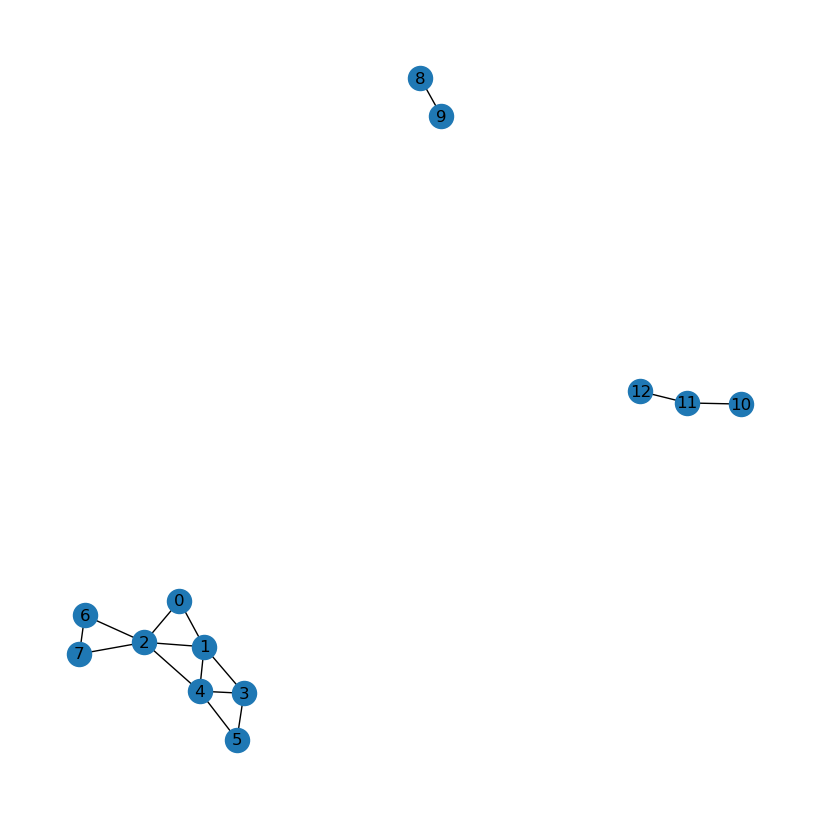

Runnin BFS Layer version:
Nodes discovered from 0: [0, 1, 2, 3, 4, 5, 6, 7]
Layers: [[0], [1, 2], [3, 4, 6, 7], [5], []]
BFS tree: [(0, 1), (0, 2), (1, 3), (1, 4), (2, 6), (2, 7), (3, 5)]

Running BFS Queue version:
Nodes discovered from 0: [0, 1, 2, 3, 4, 5, 6, 7]
BFS tree: [(0, 1), (0, 2), (1, 3), (1, 4), (2, 6), (2, 7), (3, 5)]


In [9]:
# example undirected graph
adjacency_list = [[1,2], [0,2,3,4], [0,1,4,6,7], [1,4,5], [1,3,5], [4], [2,7], [2,6], [9], [8], [11], [10,12], [11]]

plot_graph(adjacency_list, fig_size=8)

# run BFS version 1
print(f"Runnin BFS Layer version:")
s = 0
discovered, layers, T = BFS_layer_version(adjacency_list, s, return_tree=True)
print(f"Nodes discovered from {s}: {[i for i, d in enumerate(discovered) if d]}") 
print(f"Layers: {layers}")
print(f"BFS tree: {T}\n")

# run BFS version 2
print(f"Running BFS Queue version:")
s = 0
discovered, T = BFS_queue_version(adjacency_list, s, return_tree=True)
print(f"Nodes discovered from {s}: {[i for i, d in enumerate(discovered) if d]}")
print(f"BFS tree: {T}")

